# About Project_ Temperature_Forecast

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.



Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

How we can deal with this dataset:
    
    1- upload dataset
    2- checking shape,info,dtype, etc..
    3- check null values and treat
    4- deal with catagorical values
    5- treat outliers and skewness
    6- Model run, train, test, split
    7- check best r2 score
    8- saving model

In [1]:
#importing all required library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")

impoting all important libraries

In [2]:
#uploading dataset
df=pd.read_csv("Temperature_Forecast.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


upload the dataset

In [3]:
#changing Dataset in Dataframe
df=pd.DataFrame(data=df)

# EDA

In [4]:
# top 5 rows of dataset
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


check top 5 rows of dataset

In [5]:
#name of column index
df.keys()

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

checking the keys of dataset

In [6]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

checking the unique value of dataset

In [7]:
df.value_counts()

station  Date        Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH    LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  lat      lon      DEM       Slope   Solar radiation  Next_Tmax  Next_Tmin
25.0     31-07-2017  28.4          24.4          42.141735    82.320488    34.143830         24.740418         5.402538   8.650611    0.475789   0.261014   0.019021   0.100850   0.000000    0.000000    0.000000    0.000000    37.5237  126.970  19.5844   0.2713  5414.240723      33.8       24.0         1
9.0      12-08-2014  30.1          21.8          70.757713    97.710205    25.931924         22.091475         3.419272   30.018019   0.338613   0.611405   0.619563   0.628082   0.000000    0.001118    0.000000    0.000000    37.4967  126.826  50.9312   0.4125  5109.809570      26.6       21.3         1
         11-07-2017  31.9          22.3          76.737221    97.251923    26.871555      

checking the value count of dataset

In [8]:
df.shape

(7752, 25)

Dataset has 7752 coulmns and 25 rows

In [9]:
df.dtypes


station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

only Date in object value and remains are in float value so we will treat it 

In [10]:
df.info()
#getting more info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# Dealing with Null values

In [11]:
df.isnull()
#reverifing the null value again

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7750,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()
# total null value in dataset is 0

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

there are null values in every column so we have to treat it 

Dealing with dates column

In [13]:
df['Date'] = pd.to_datetime(df.Date)

In [14]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', inplace = True, axis = 1)

In [15]:
df.head(4)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0


In [16]:
#lets deat with null values

<AxesSubplot:>

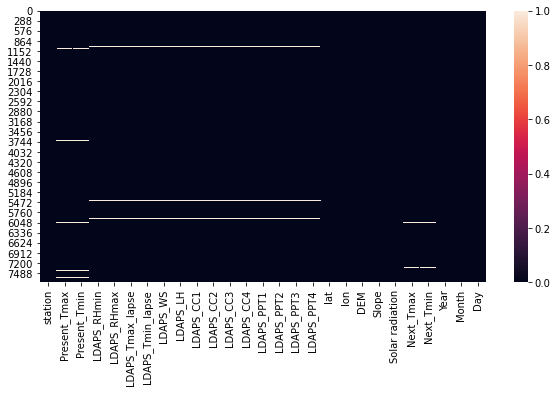

In [17]:
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull())

In [18]:
from sklearn.impute import KNNImputer

In [19]:
df_columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day']

In [20]:
knn = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df = knn.fit_transform(df)
df = pd.DataFrame(df, columns = df_columns)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [21]:
#lets check again the null values
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

We successfully treated the null values of every columns

# Checking Correlation of dataset

In [22]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.00000
mean,12.998865,29.769249,23.226713,56.712966,88.369128,29.633310,23.526105,7.089773,62.527477,0.368300,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.275544,22.934450,2015.000155,7.080547,16.37211
std,7.212017,2.963391,2.408518,14.620018,7.168515,2.941858,2.339946,2.176008,33.645225,0.261542,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.125852,2.485431,1.414170,2.238181,8.24190
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.00000
25%,7.000000,27.800000,21.700000,45.973853,84.246307,27.693091,22.114651,5.680214,37.412333,0.148273,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.380000,2014.000000,7.000000,8.00000
50%,13.000000,29.900000,23.400000,54.959623,89.750568,29.744207,23.771672,6.540041,56.953214,0.314835,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.00000
75%,19.000000,32.000000,24.900000,67.078279,93.711344,31.734400,25.162746,8.009219,84.192035,0.571811,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.00000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.00000


<AxesSubplot:>

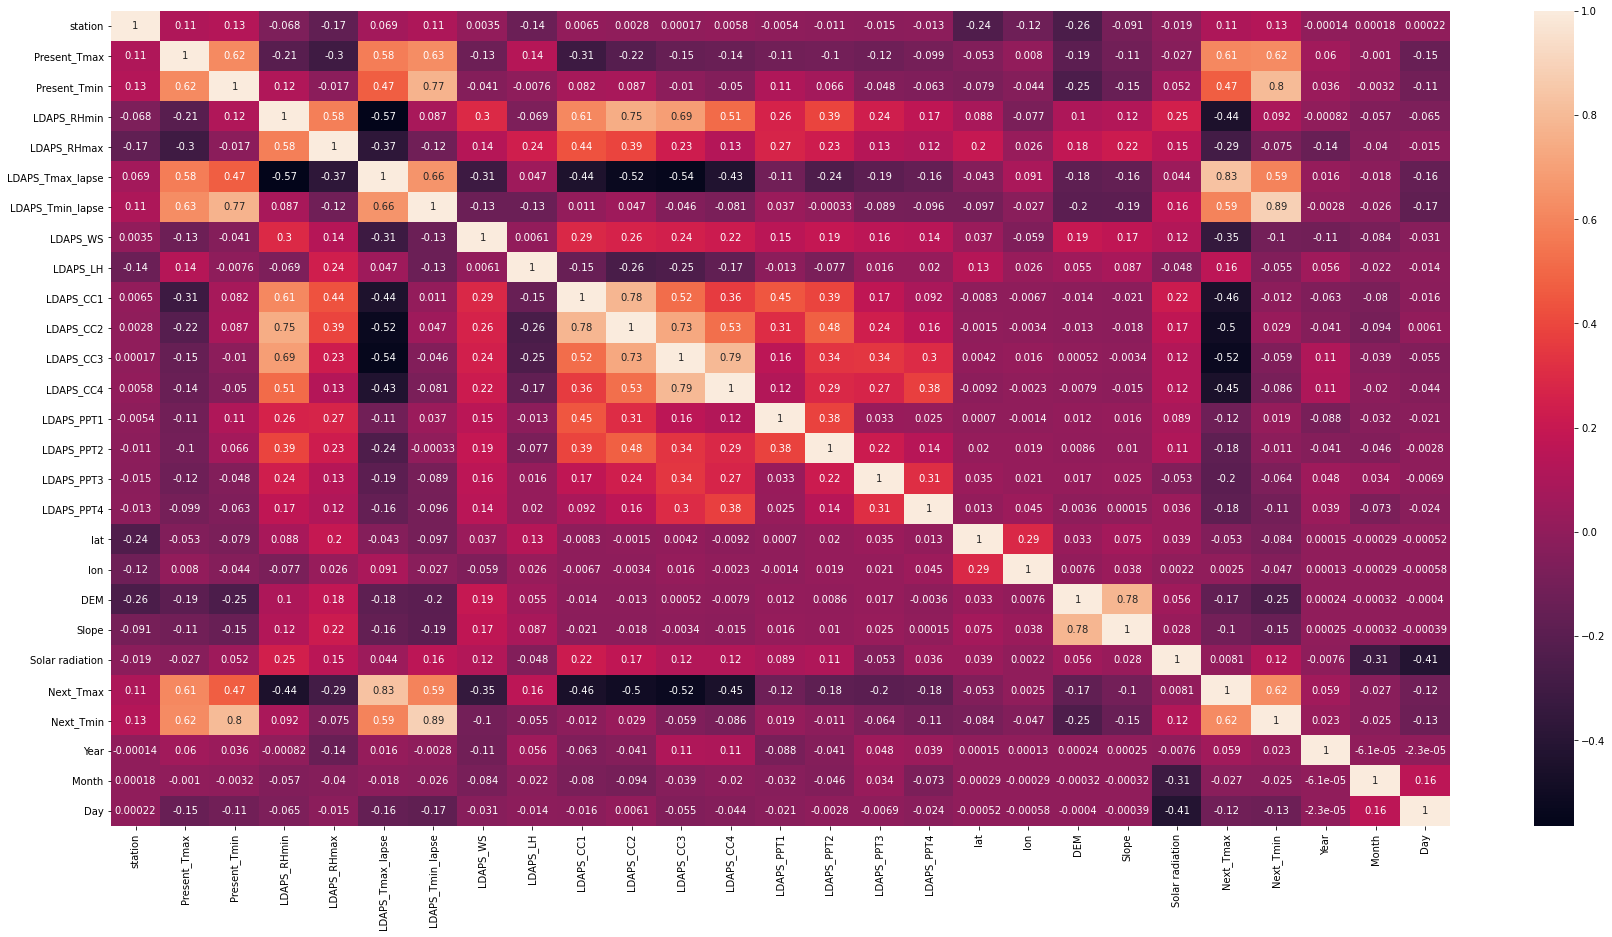

In [23]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

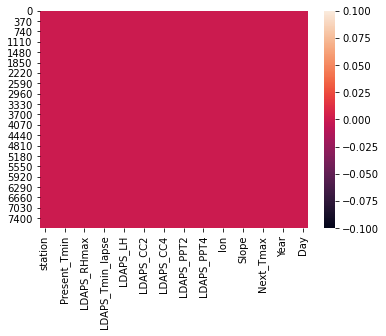

In [24]:
#once again checking null value through heat map
sns.heatmap(df.isnull())
#no null values are present

checking null value through heatmap, there is no null value

In [25]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day'],
      dtype='object')

# Dataset Analysis by Univariate, bivariate and multivariate

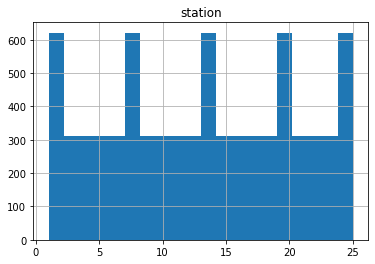

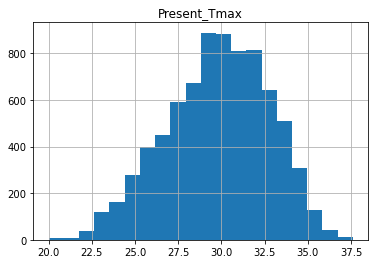

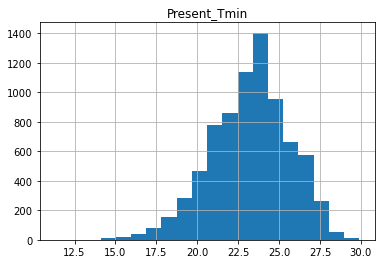

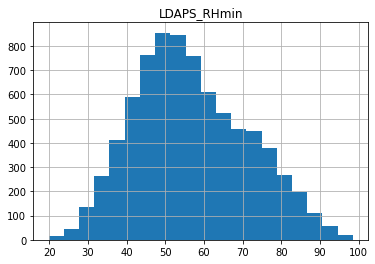

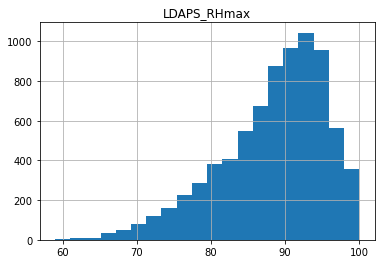

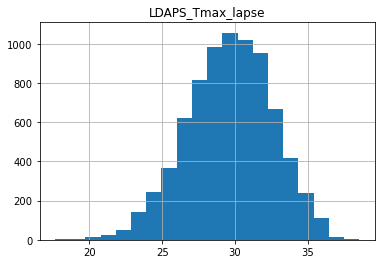

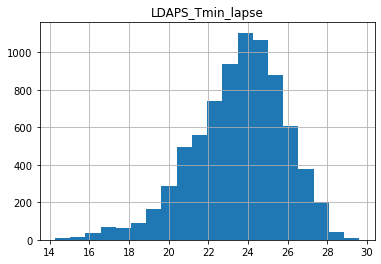

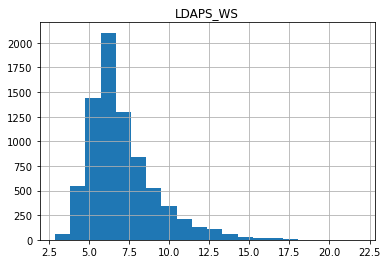

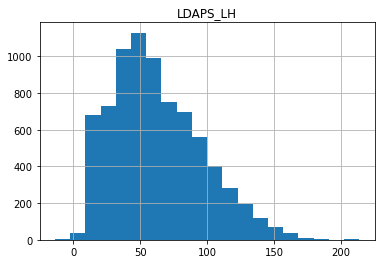

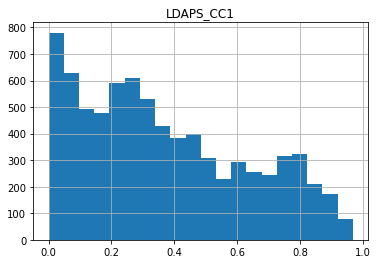

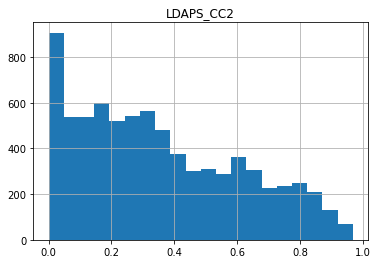

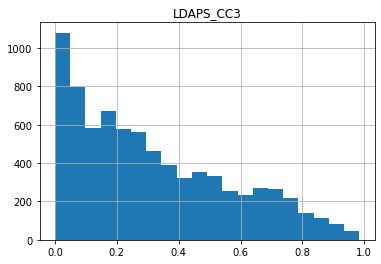

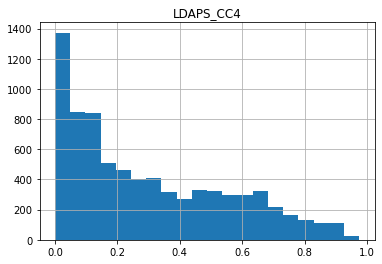

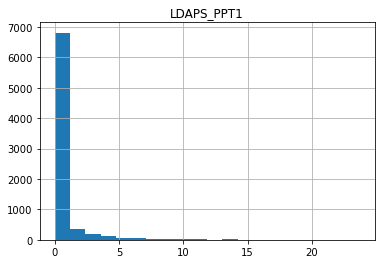

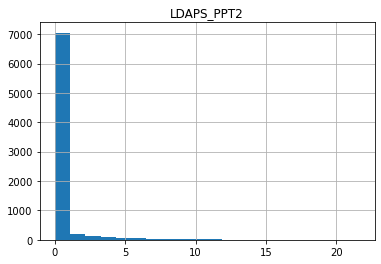

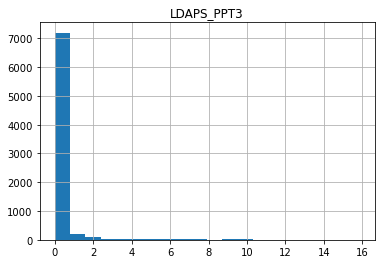

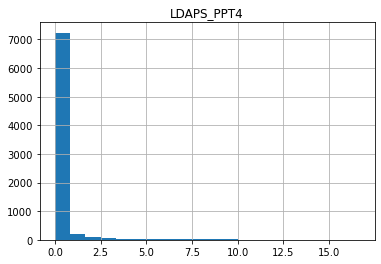

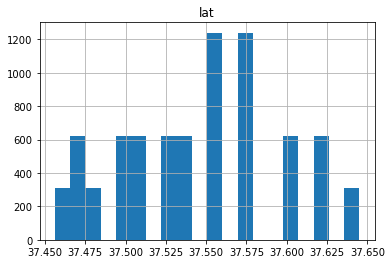

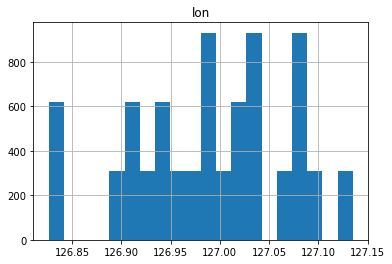

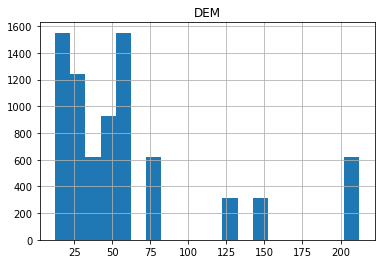

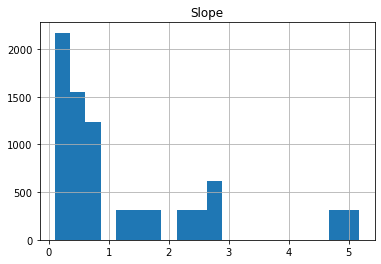

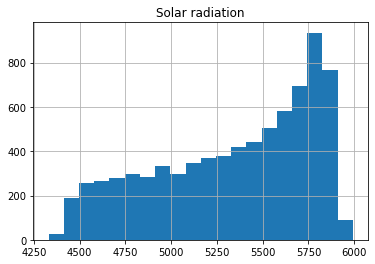

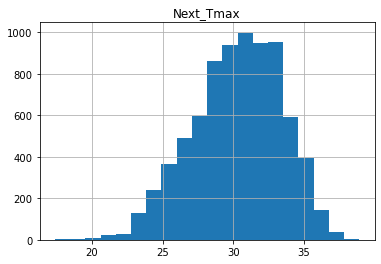

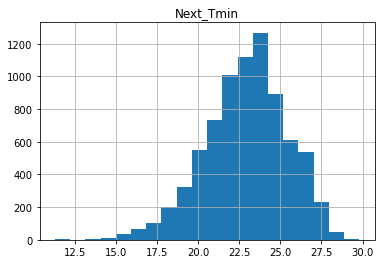

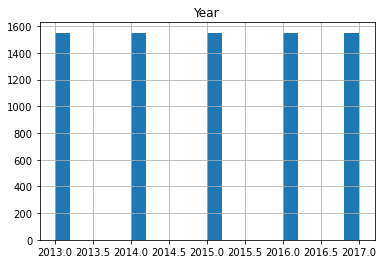

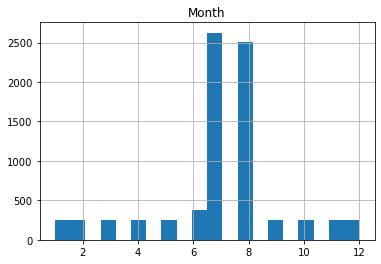

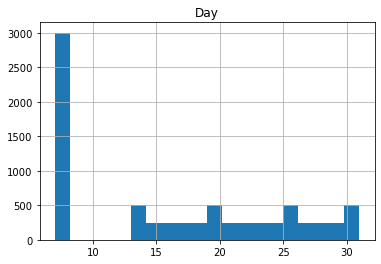

In [26]:
#using the below code creating histplot.
columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day']

for i in df[columns]:
    plt.figure()
    plt.title(i)
    df[i].hist(bins=20)

check the histplot of all coulmn in same time

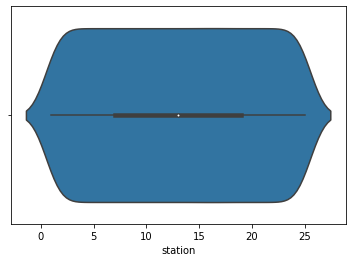

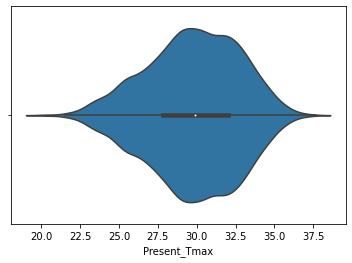

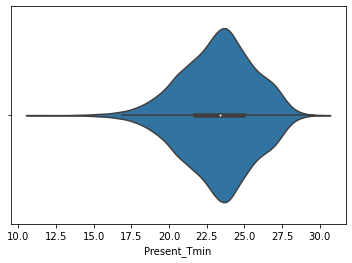

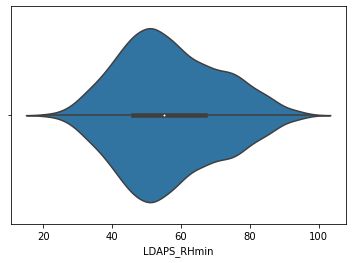

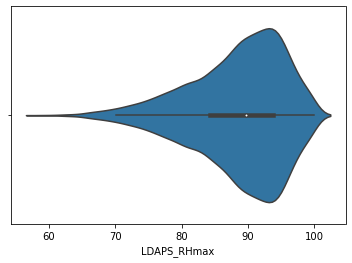

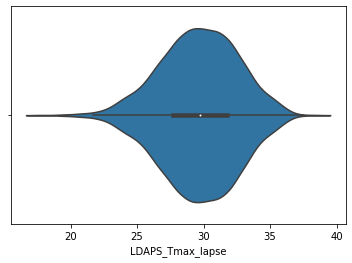

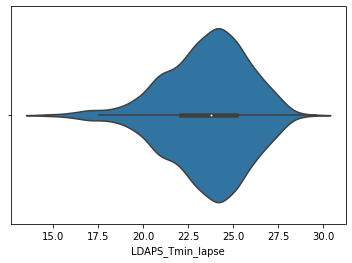

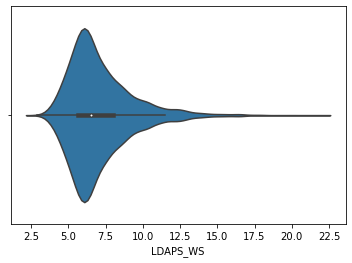

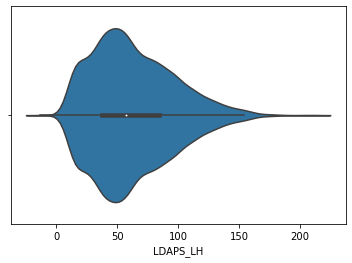

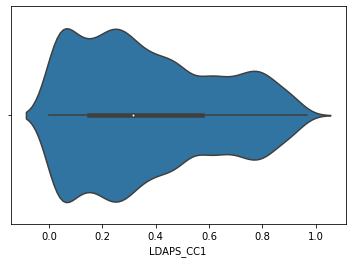

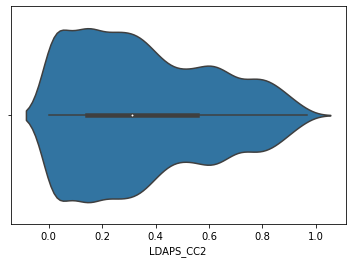

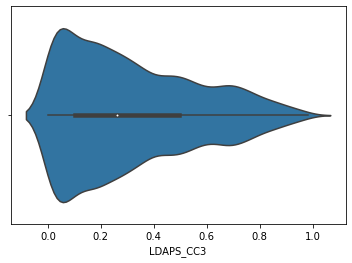

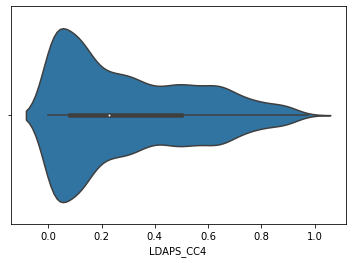

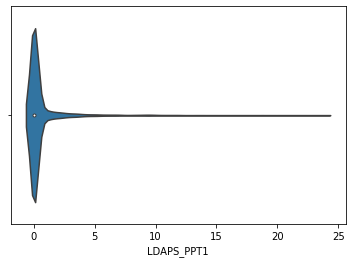

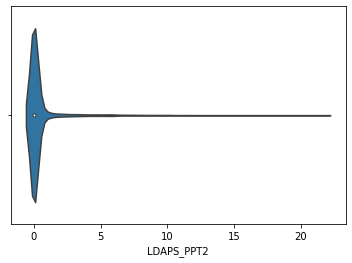

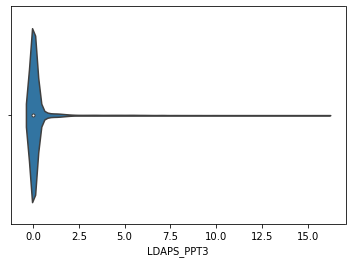

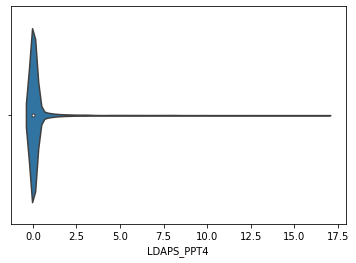

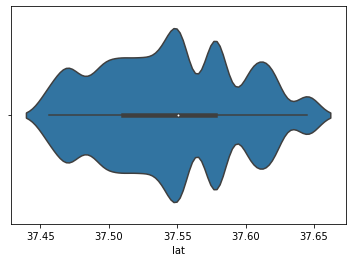

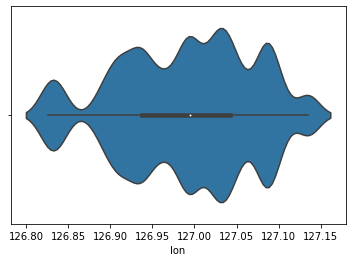

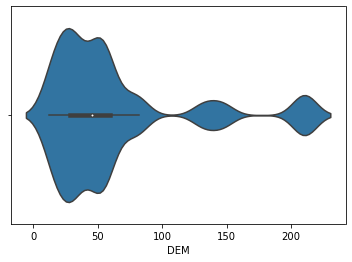

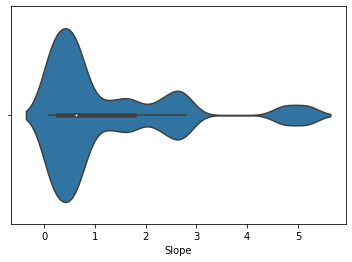

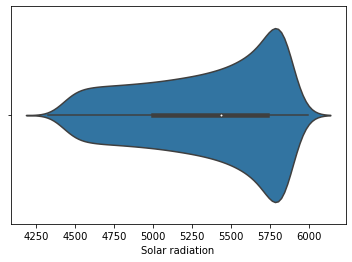

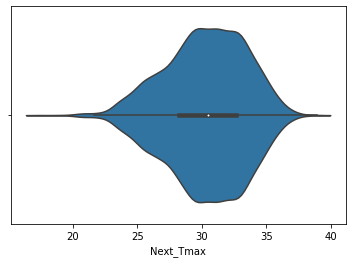

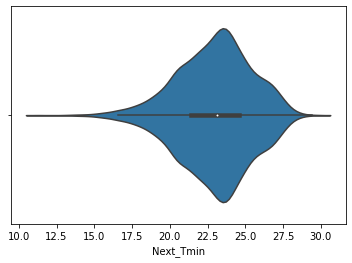

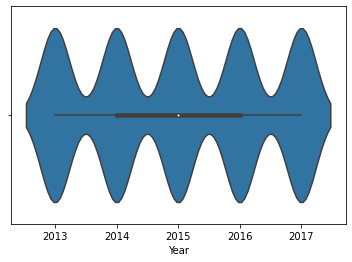

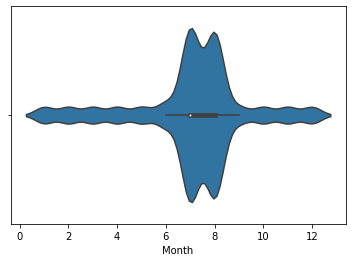

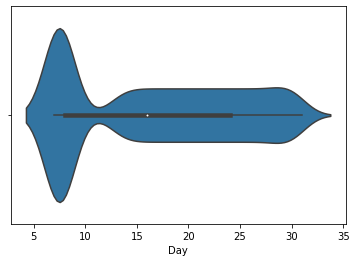

In [27]:
#using the below code creating violinplot.
columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day']

for i in df[columns]:
    plt.figure()
    sns.violinplot(df[i], data=df)

checking the violinplot in same time for all columns

<AxesSubplot:xlabel='station', ylabel='Present_Tmax'>

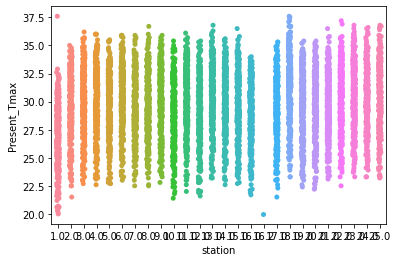

In [28]:
 sns.stripplot(data=df, x=df['station'],y=df['Present_Tmax'])

<AxesSubplot:xlabel='station', ylabel='Present_Tmin'>

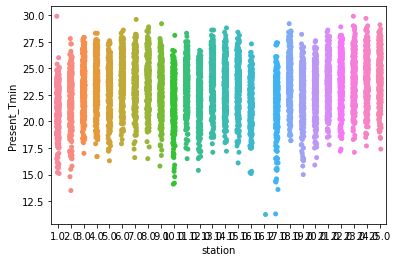

In [29]:
sns.stripplot(data=df, x=df['station'],y=df['Present_Tmin'])

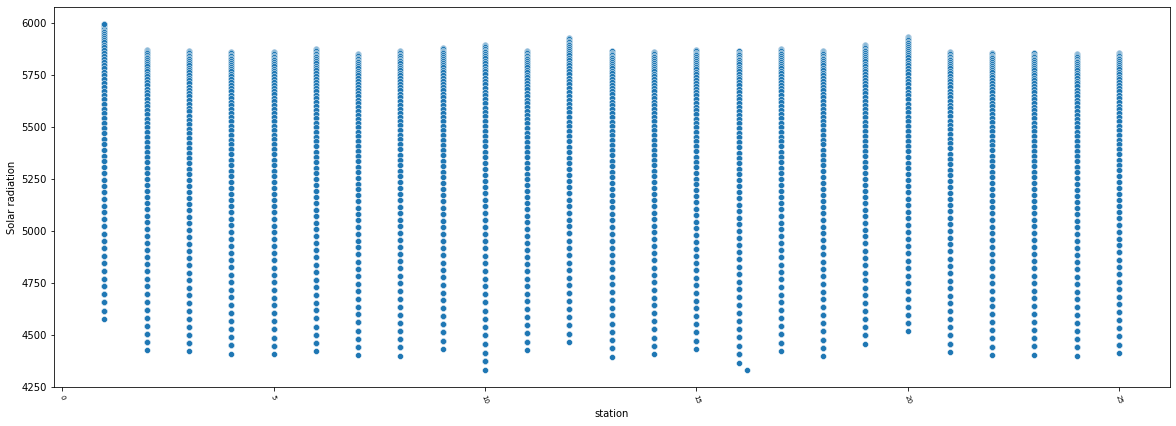

In [30]:
plt.figure(figsize = (20,7))
sns.scatterplot(y="Solar radiation", x="station", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

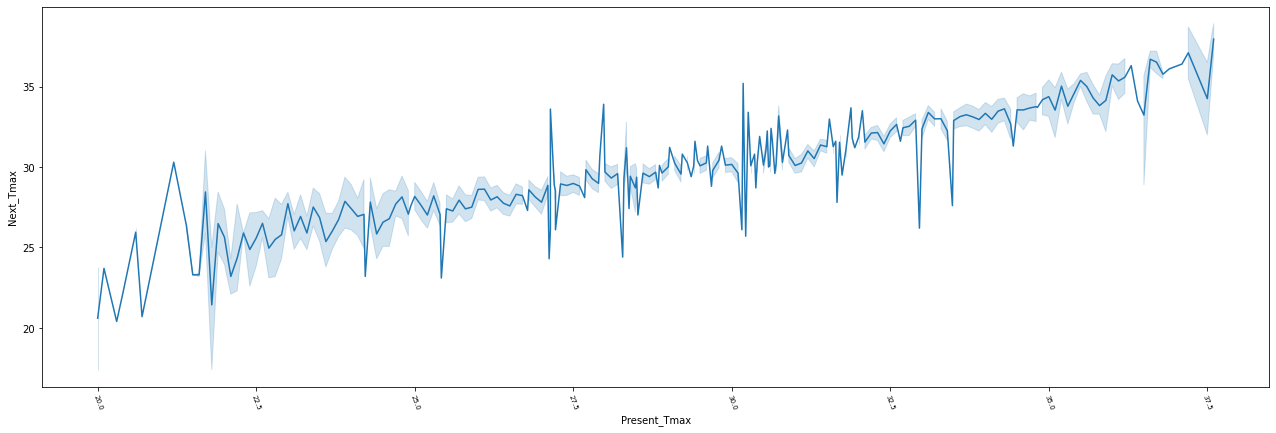

In [31]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmax", x="Present_Tmax", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

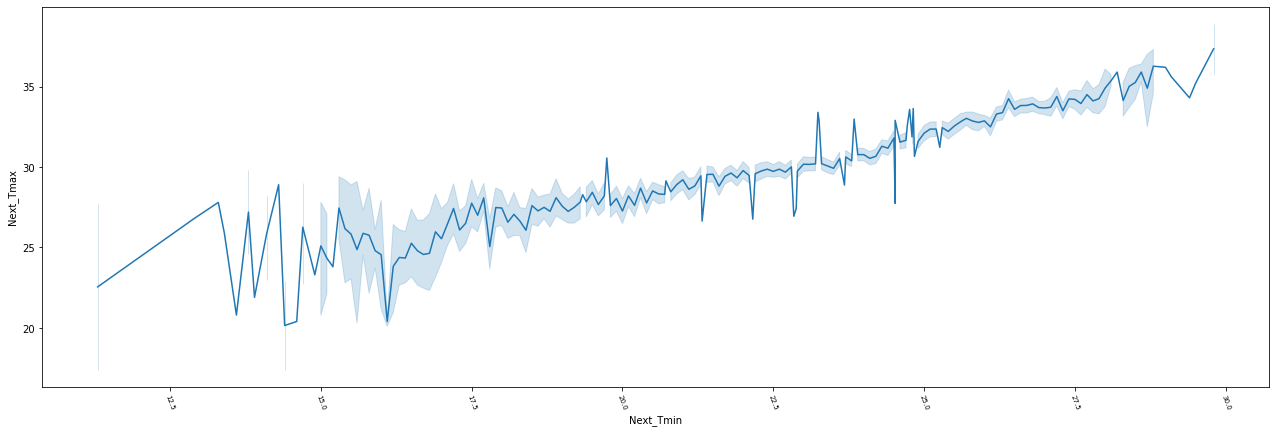

In [32]:
plt.figure(figsize = (22,7))
sns.lineplot(y="Next_Tmax", x="Next_Tmin", data = df)
plt.xticks(rotation = -70, fontsize = 7)
plt.show()

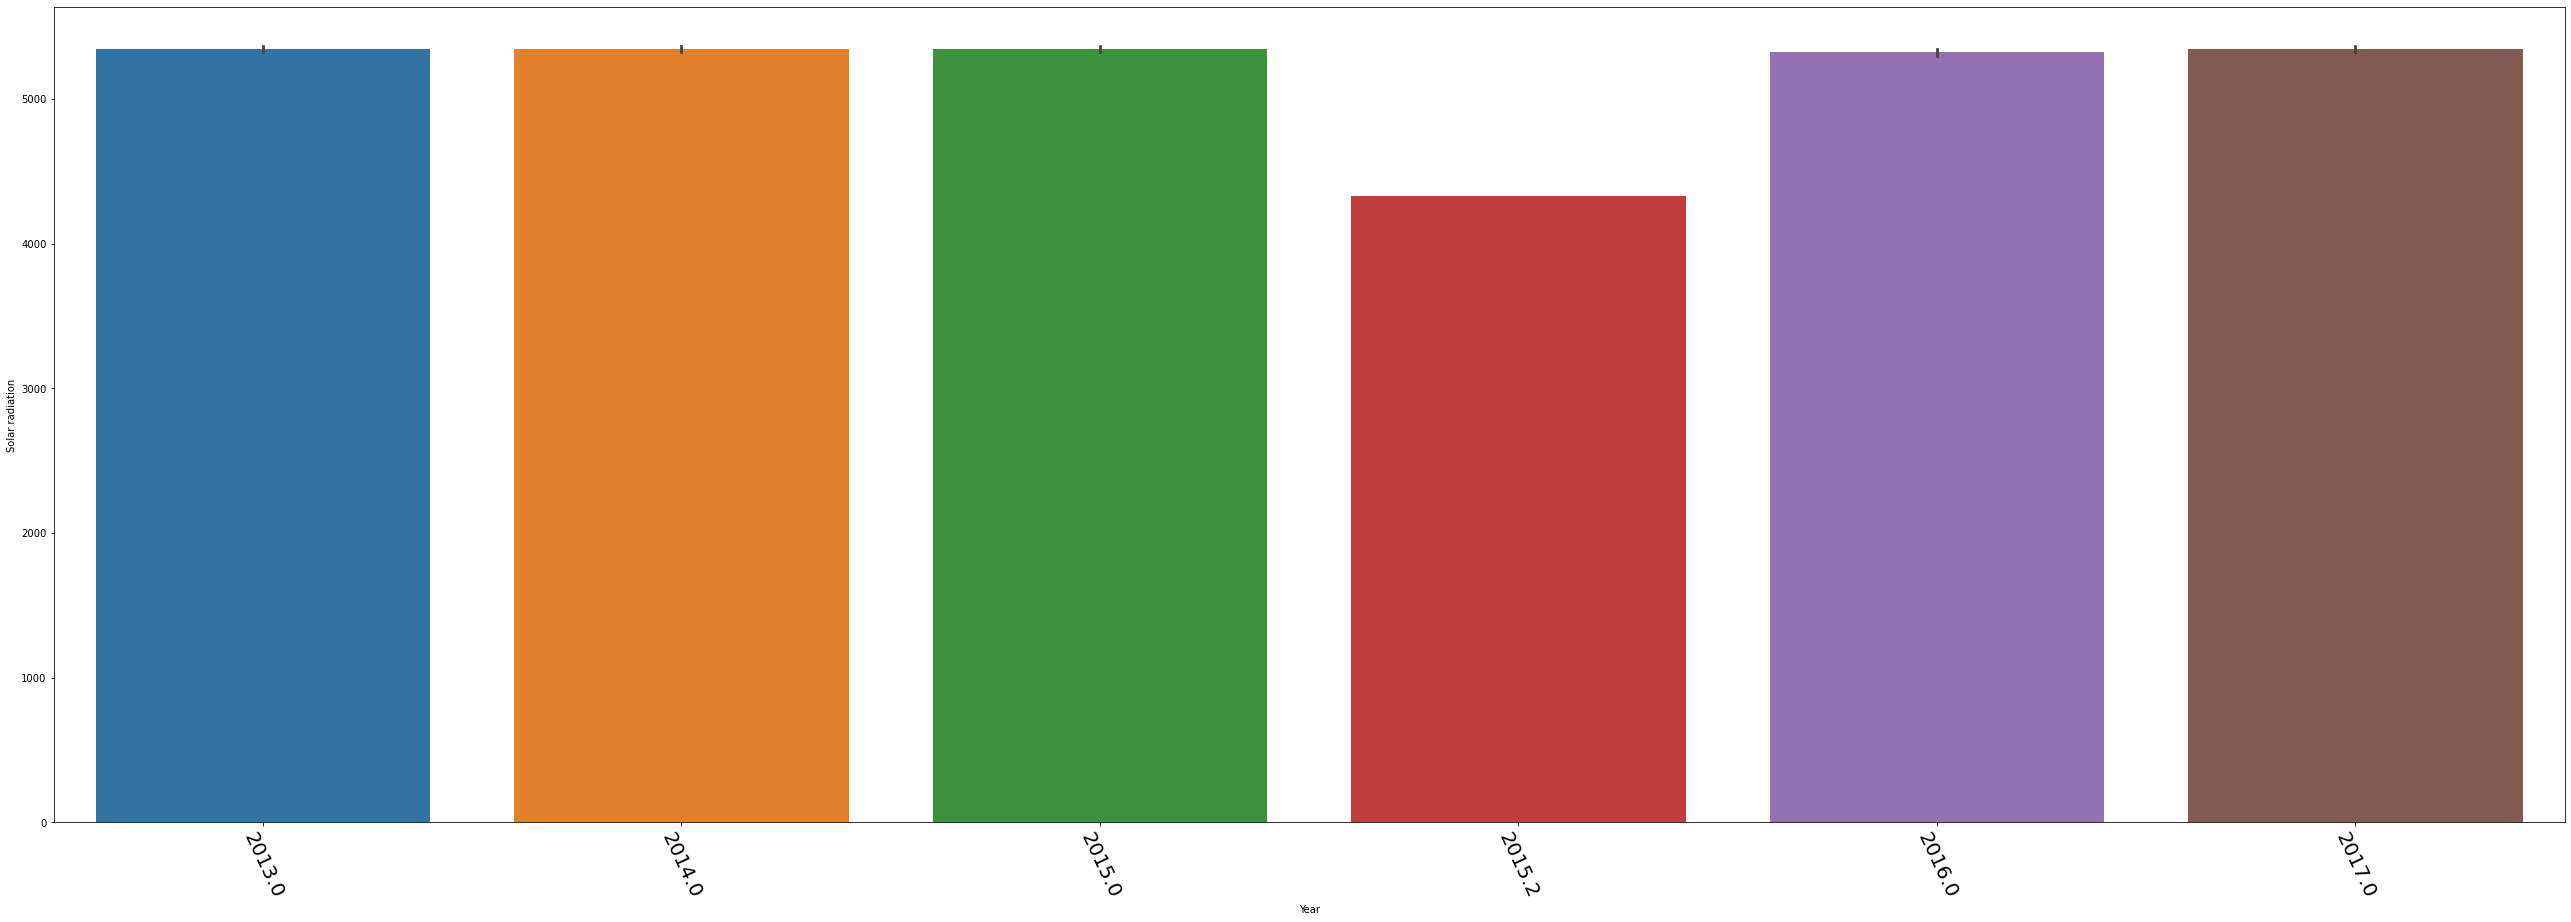

In [33]:
plt.figure(figsize = (45,15))
sns.barplot(x = 'Year', y ='Solar radiation', data = df)
plt.xticks(rotation = -65, fontsize = 20)
plt.show()

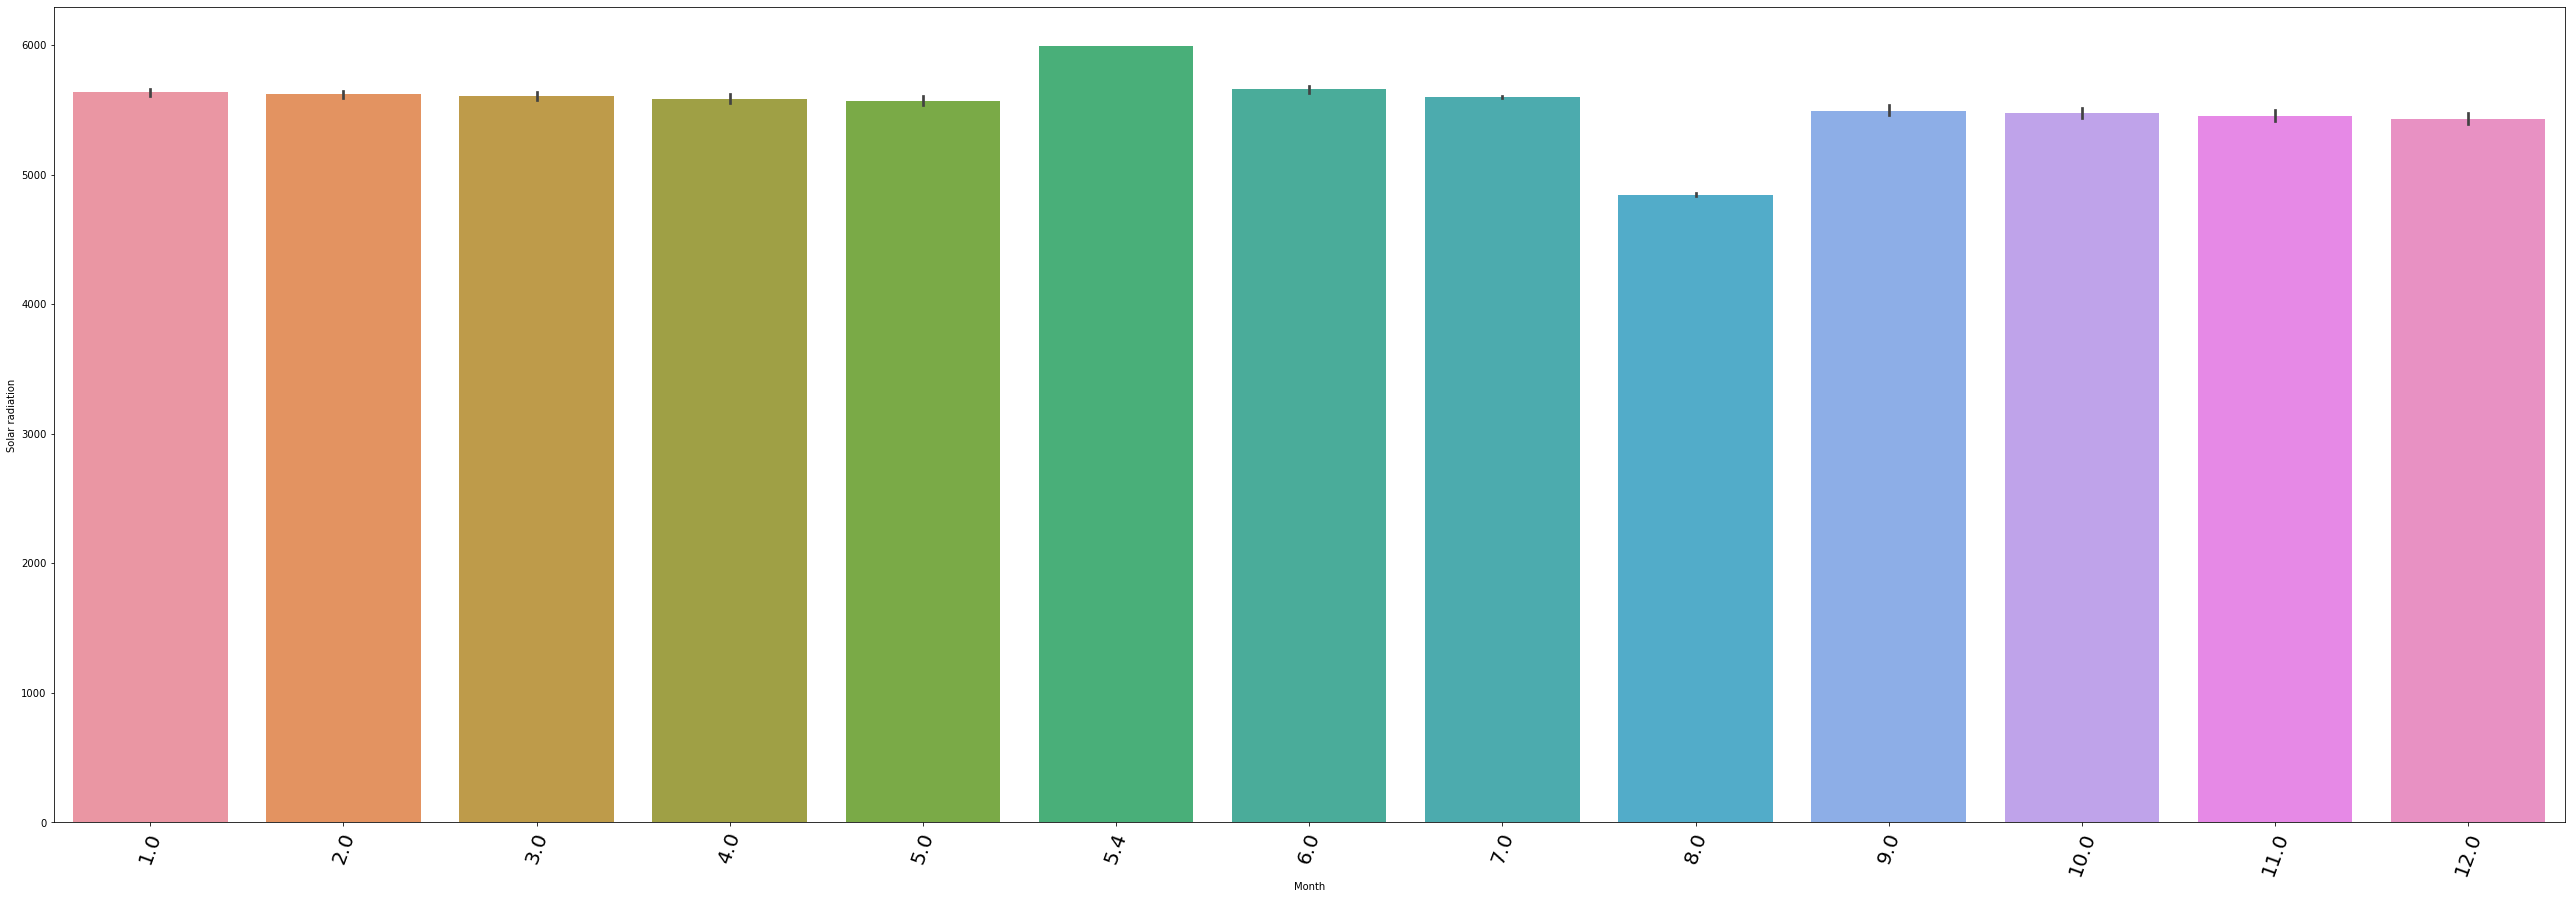

In [34]:
plt.figure(figsize = (45,15))
sns.barplot(x = 'Month', y ='Solar radiation', data = df)
plt.xticks(rotation = 70, fontsize = 20)
plt.show()

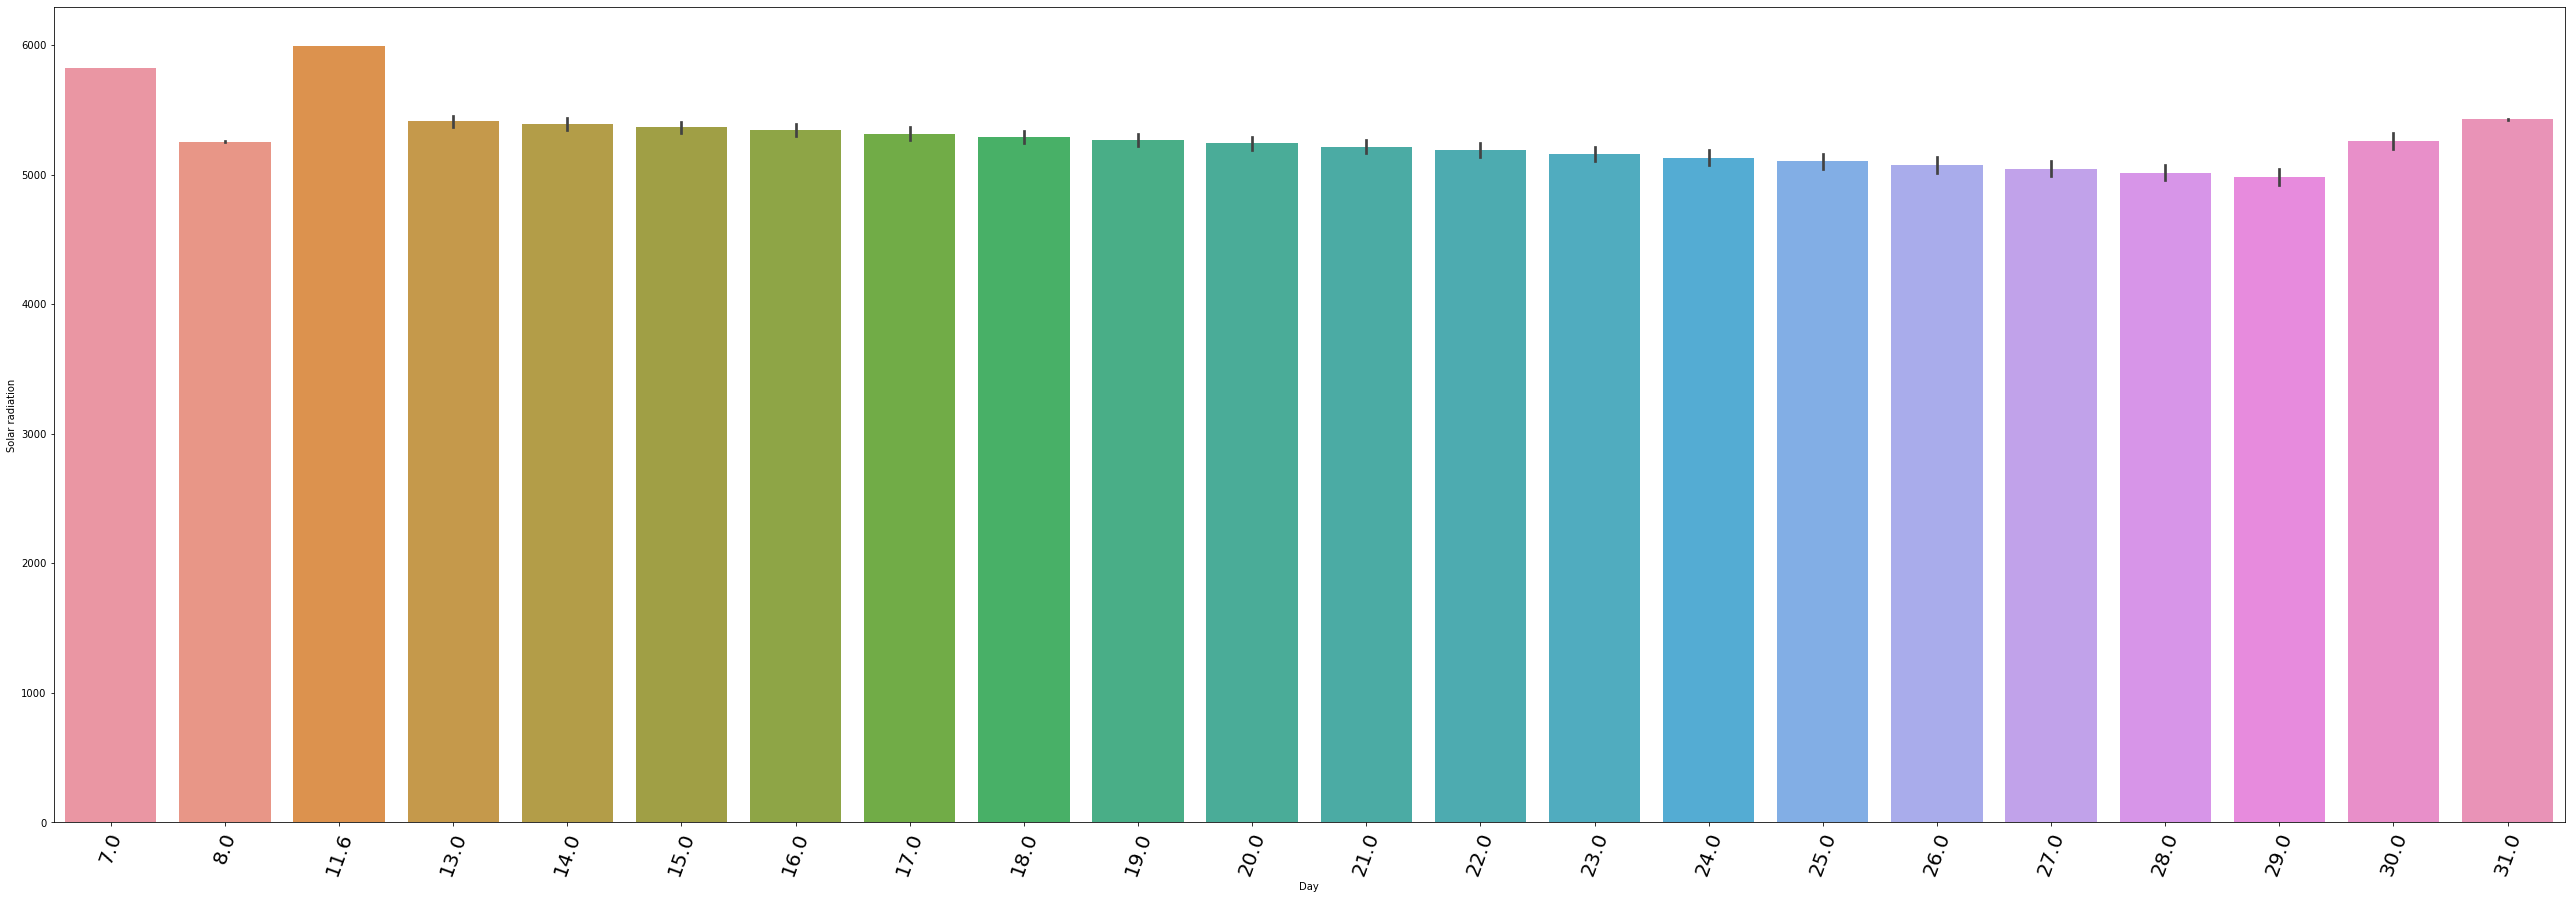

In [35]:
plt.figure(figsize = (45,15))
sns.barplot(x = 'Day', y ='Solar radiation', data = df)
plt.xticks(rotation = 70, fontsize = 20)
plt.show()

In [36]:
#sns.pairplot(df)

# Removing outliers & Skewness 

station                 AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Present_Tmax         AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Present_Tmin         AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
LDAPS_RHmin          AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
LDAPS_RHmax          AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
LDAPS_Tmax_lapse     AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
LDAPS_Tmin_lapse     AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
LDAPS_WS               AxesSubplot(0.125,0.518913;0.0945122x0.16413)
LDAPS_LH            AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
LDAPS_CC1           AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
LDAPS_CC2           AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
LDAPS_CC3           AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
LDAPS_CC4           AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
LDAPS_PPT1          AxesSubplot(0.805488,0.518913;0.0945122x0.16413)
LDAPS_PPT2             AxesSubplot

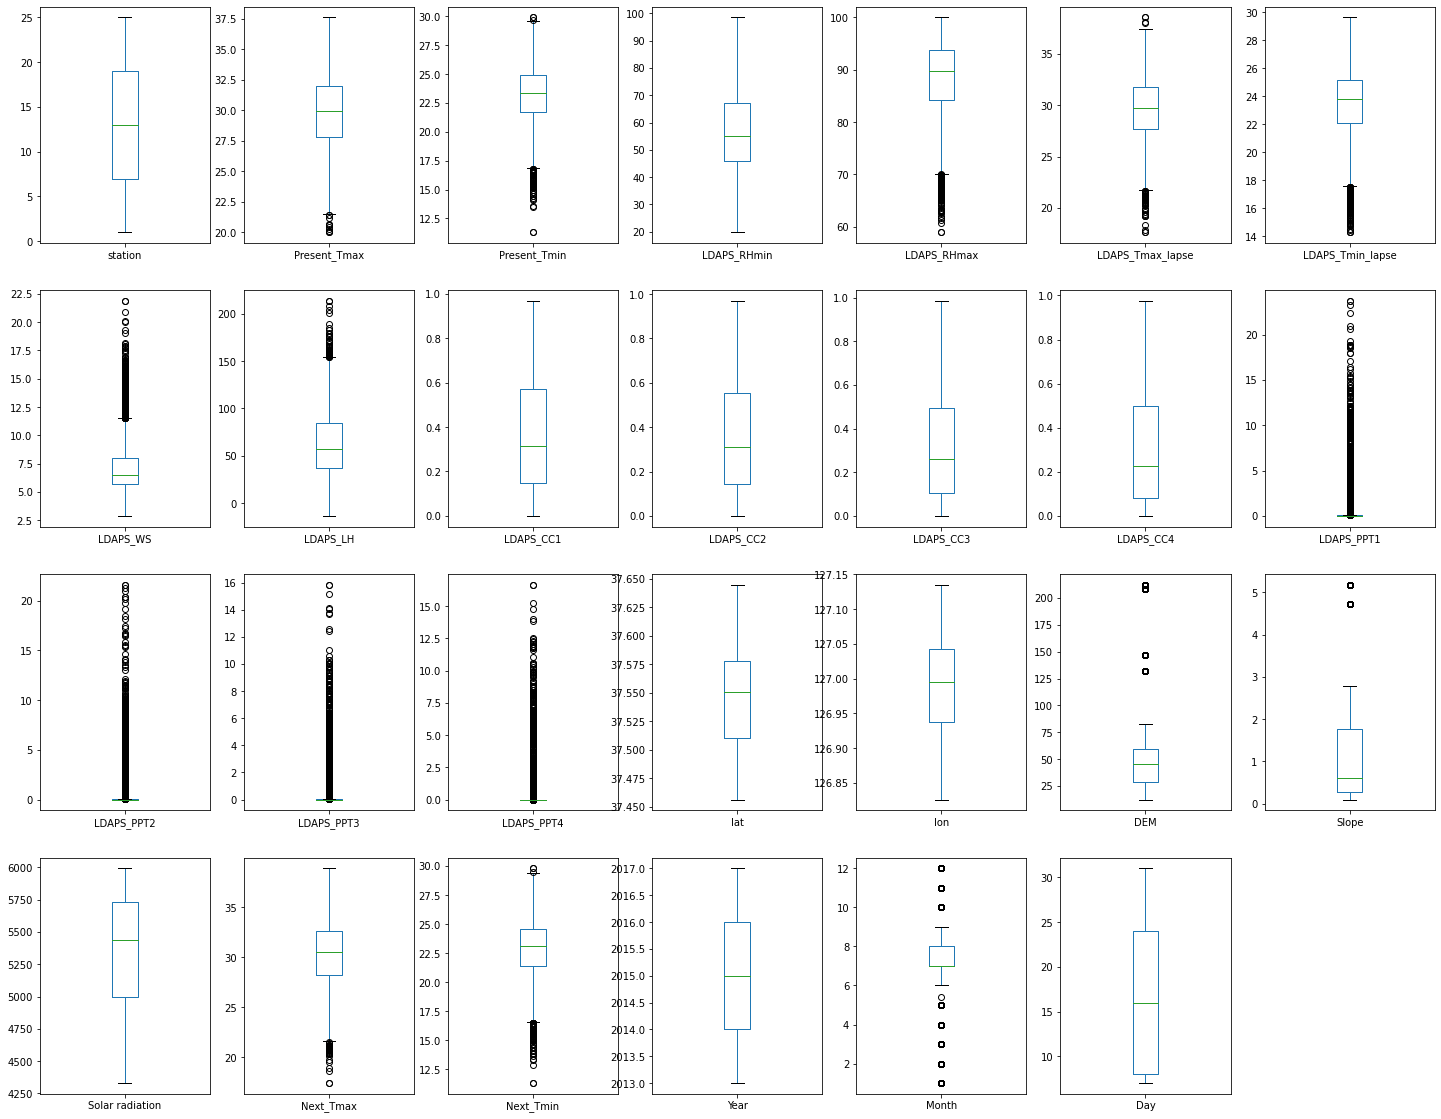

In [37]:
df.plot(kind="box",subplots=True,layout=(4,7),figsize=(25,20))

there is oulier in almost all columns

In [38]:
#Removing the Outliers through IQR method
def removeOutlier(col):
    sorted(col)
    qua1,qua2=col.quantile([0.25,0.75])
    IQR=qua2 - qua1
    lowerRange = qua1- (1.5*IQR)
    upperRange = qua2+(1.5*IQR)
    return lowerRange, upperRange

In [39]:
columns=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Next_Tmax', 'Next_Tmin', 'Month']
for i in df[columns]:
    lowScore, highScore= removeOutlier(df[i])
    df[i]=np.where(df[i]>highScore,highScore,df[i])
    df[i]=np.where(df[i]<lowScore,lowScore,df[i])

station                 AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Present_Tmax         AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Present_Tmin         AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
LDAPS_RHmin          AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
LDAPS_RHmax          AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
LDAPS_Tmax_lapse     AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
LDAPS_Tmin_lapse     AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
LDAPS_WS               AxesSubplot(0.125,0.518913;0.0945122x0.16413)
LDAPS_LH            AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
LDAPS_CC1           AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
LDAPS_CC2           AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
LDAPS_CC3           AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
LDAPS_CC4           AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
LDAPS_PPT1          AxesSubplot(0.805488,0.518913;0.0945122x0.16413)
LDAPS_PPT2             AxesSubplot

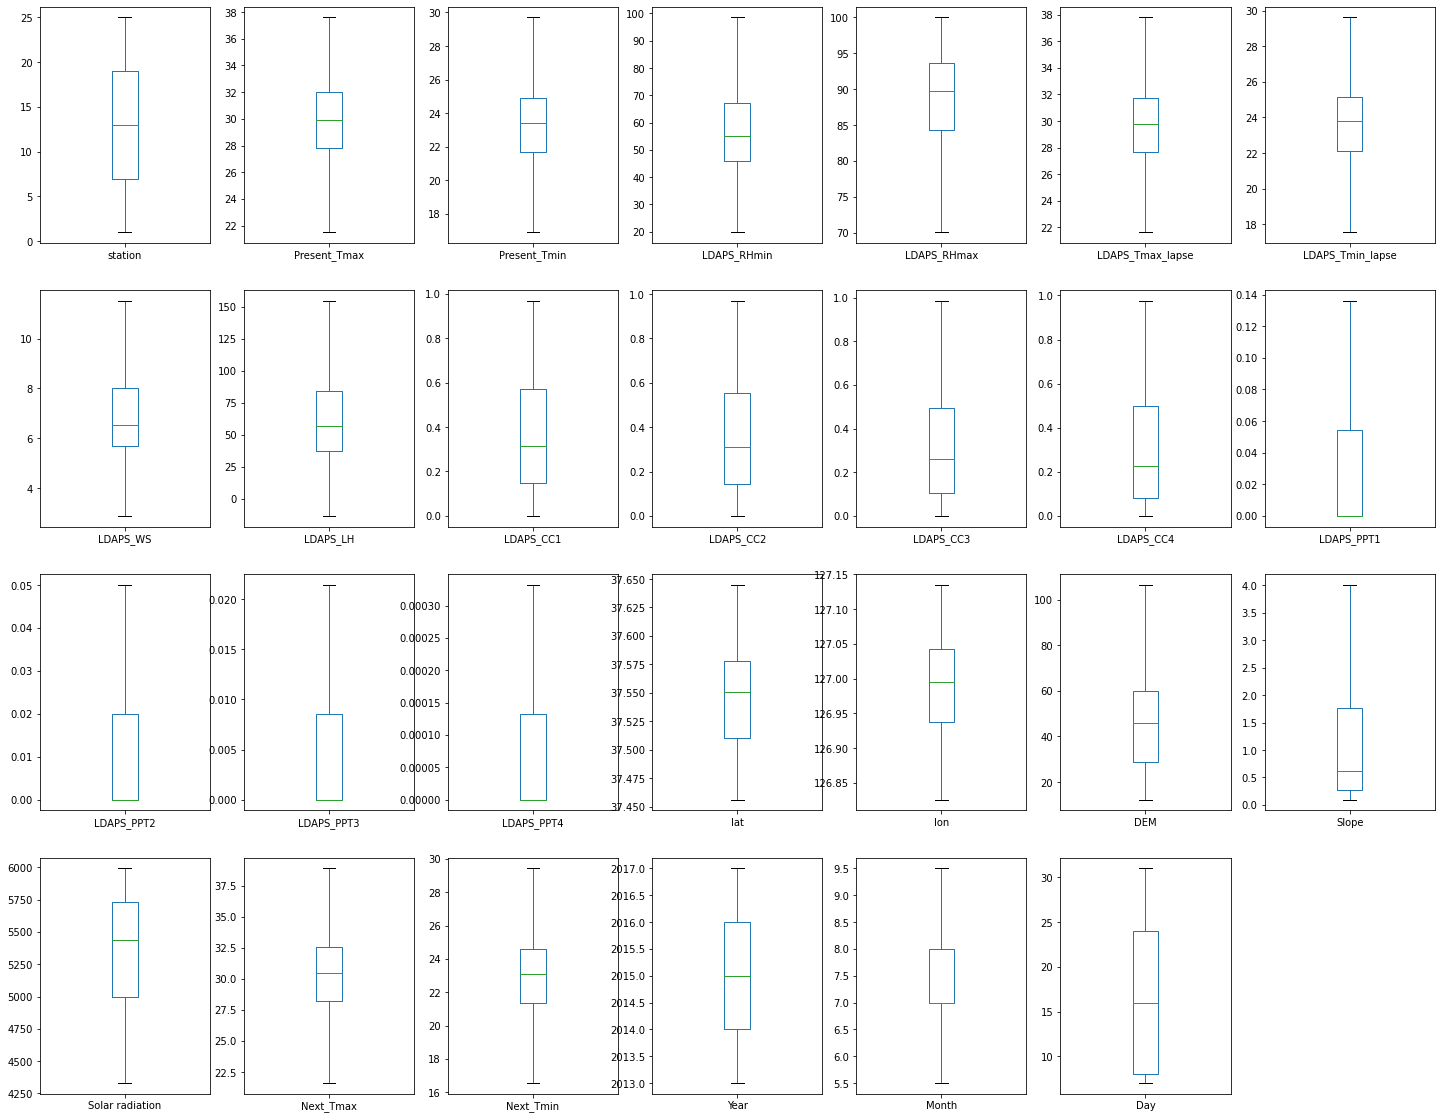

In [40]:
df.plot(kind="box",subplots=True,layout=(4,7),figsize=(25,20))
#outlier is removed now

now we can see there is no outliers in any column

# Skewness

In [41]:
df.skew()

#Skewness almost resolved

station            -0.000111
Present_Tmax       -0.253966
Present_Tmin       -0.260711
LDAPS_RHmin         0.306680
LDAPS_RHmax        -0.733649
LDAPS_Tmax_lapse   -0.182462
LDAPS_Tmin_lapse   -0.427320
LDAPS_WS            0.824267
LDAPS_LH            0.596554
LDAPS_CC1           0.462245
LDAPS_CC2           0.477772
LDAPS_CC3           0.650527
LDAPS_CC4           0.671576
LDAPS_PPT1          1.170851
LDAPS_PPT2          1.178403
LDAPS_PPT3          1.178089
LDAPS_PPT4          1.157021
lat                 0.087062
lon                -0.285213
DEM                 0.729689
Slope               1.181127
Solar radiation    -0.511210
Next_Tmax          -0.301322
Next_Tmin          -0.291398
Year               -0.000282
Month               0.054729
Day                 0.245510
dtype: float64

we have to correct skewness as well (values are more than +0.5 and less than -0.5)

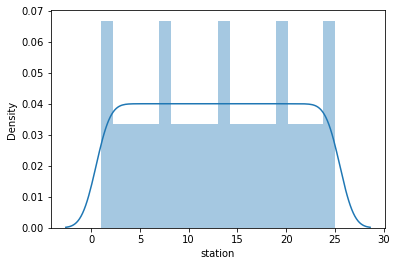

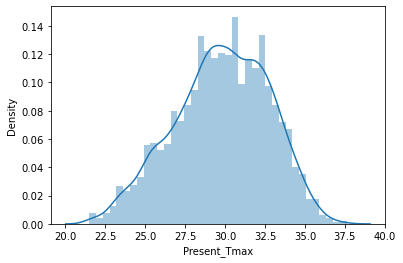

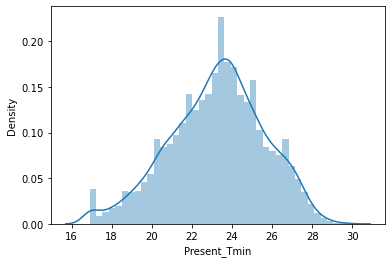

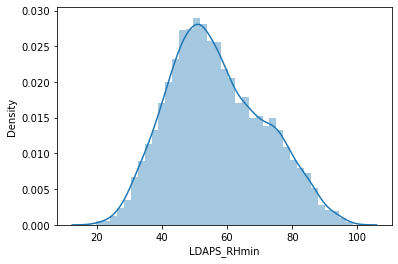

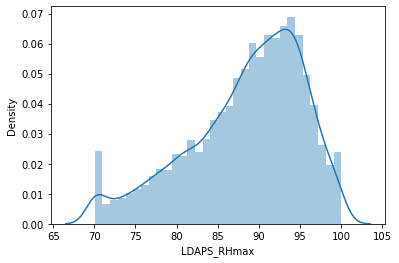

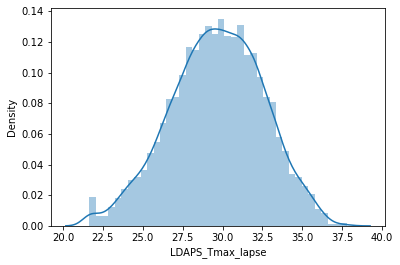

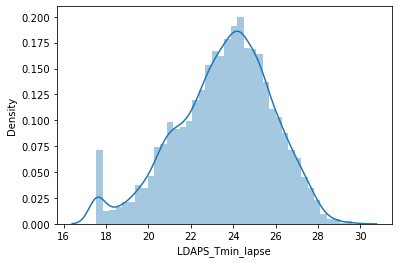

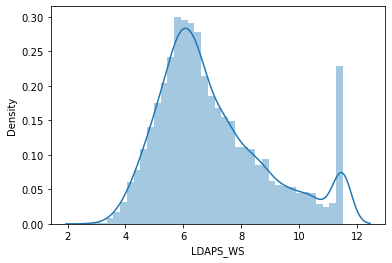

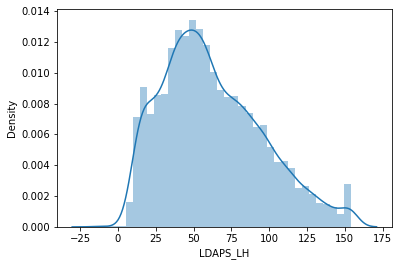

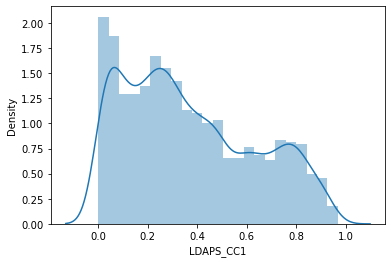

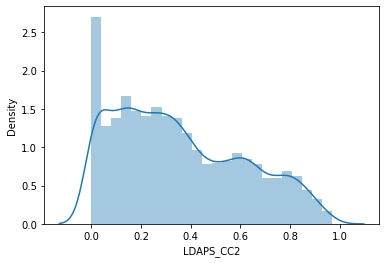

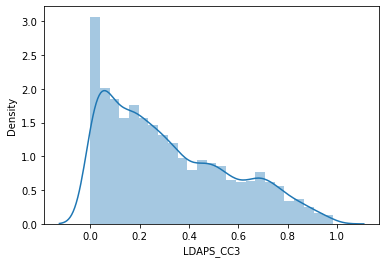

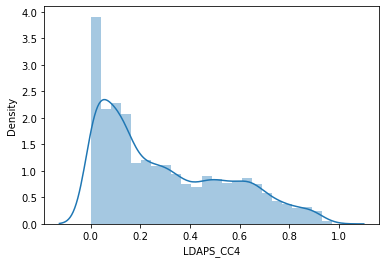

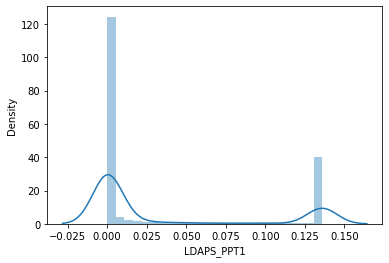

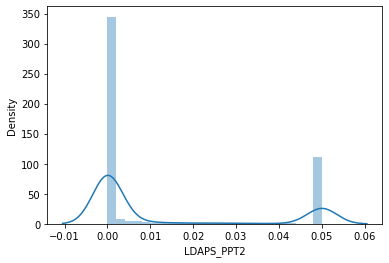

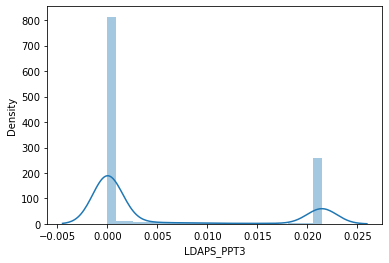

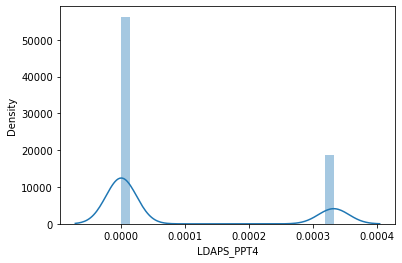

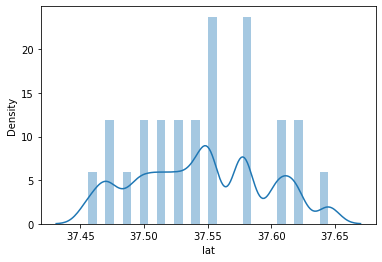

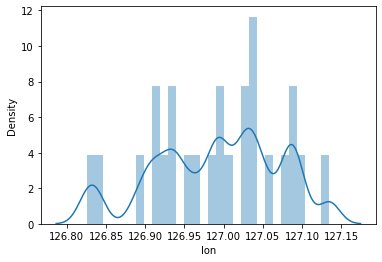

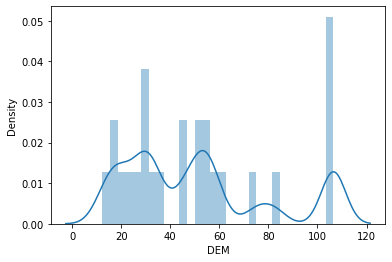

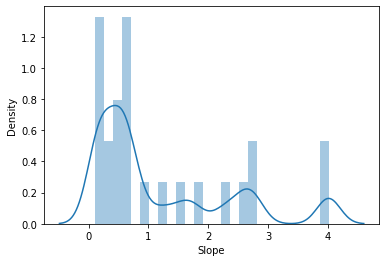

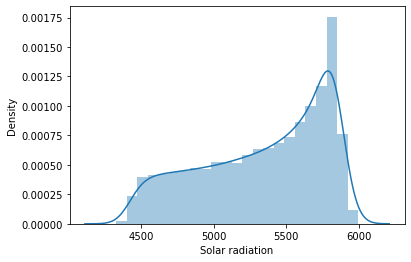

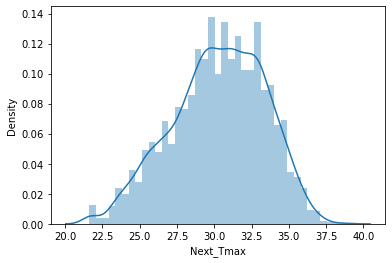

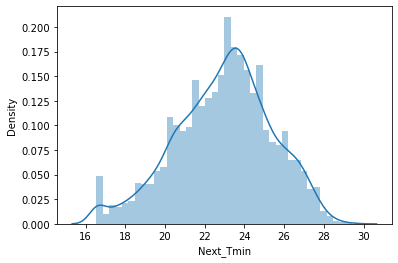

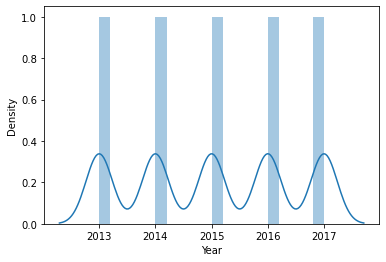

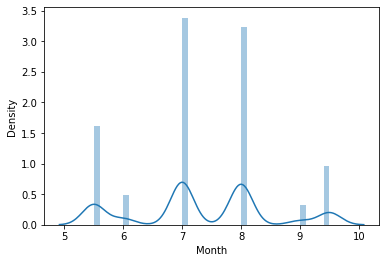

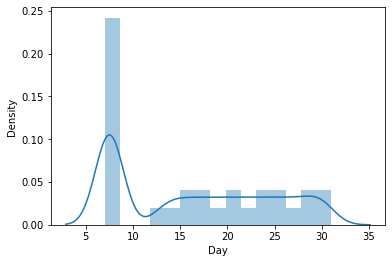

In [42]:
column = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day']

for i in df[column]:
    plt.figure()
    sns.distplot(df[i])
    
# checking skewness through the graph


Spiltting dataset

In [43]:
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)
y = df[['Next_Tmax', 'Next_Tmin']]

In [44]:
x.shape, y.shape

((7752, 25), (7752, 2))

In [45]:
y.info

<bound method DataFrame.info of       Next_Tmax  Next_Tmin
0          29.1      21.20
1          30.5      22.50
2          31.1      23.90
3          31.7      24.30
4          31.2      22.50
...         ...        ...
7747       28.3      18.10
7748       28.6      18.80
7749       27.8      17.40
7750       21.6      16.55
7751       38.9      29.43

[7752 rows x 2 columns]>

In [46]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [47]:
df_new.skew()

station            -0.204710
Present_Tmax       -0.036624
Present_Tmin       -0.022793
LDAPS_RHmin        -0.017200
LDAPS_RHmax        -0.115121
LDAPS_Tmax_lapse   -0.017773
LDAPS_Tmin_lapse   -0.030504
LDAPS_WS            0.017168
LDAPS_LH            0.040292
LDAPS_CC1           0.048560
LDAPS_CC2           0.047504
LDAPS_CC3           0.092295
LDAPS_CC4           0.131077
LDAPS_PPT1          0.987604
LDAPS_PPT2          1.023706
LDAPS_PPT3          1.026008
LDAPS_PPT4          1.150082
lat                 0.000000
lon                -0.198429
DEM                -0.021205
Slope               0.214314
Solar radiation    -0.176636
Year               -0.000298
Month              -0.022269
Day                -0.041816
dtype: float64

we tried to remove skewness from dataset

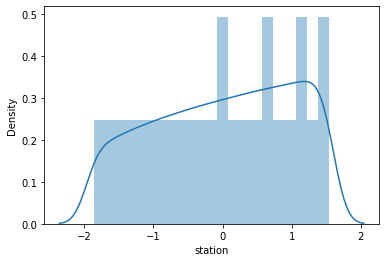

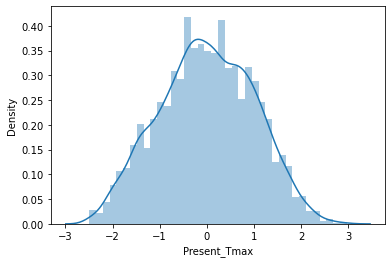

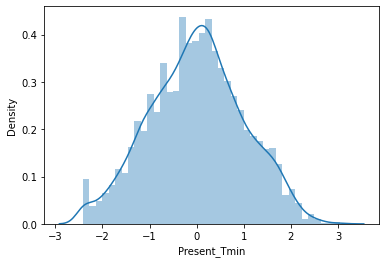

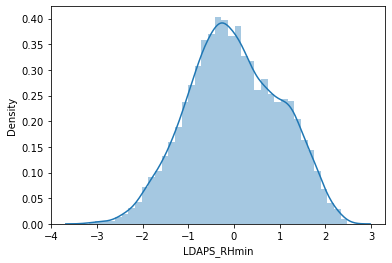

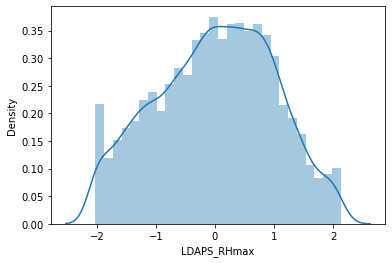

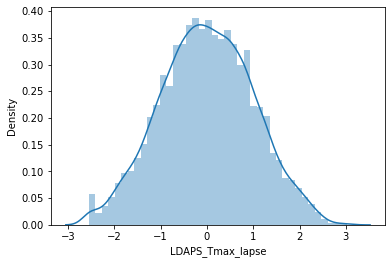

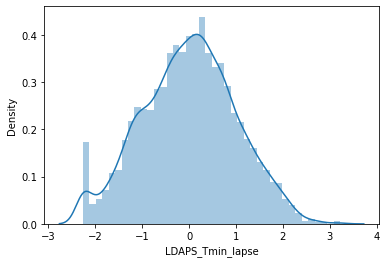

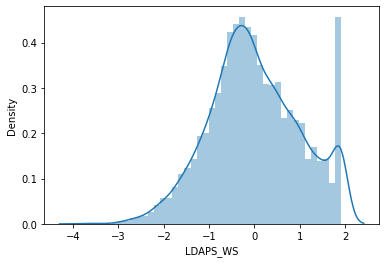

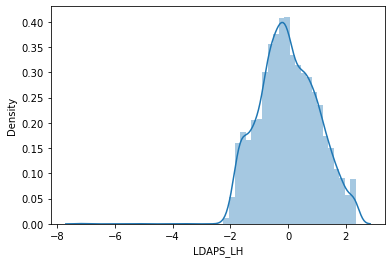

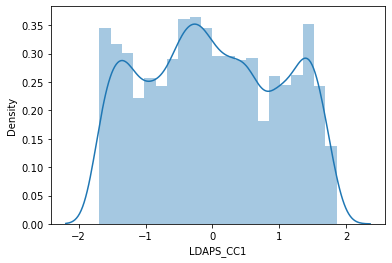

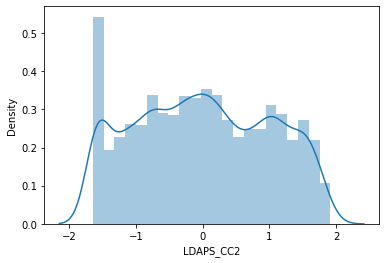

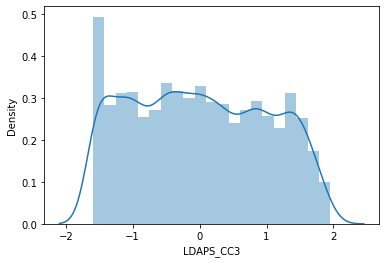

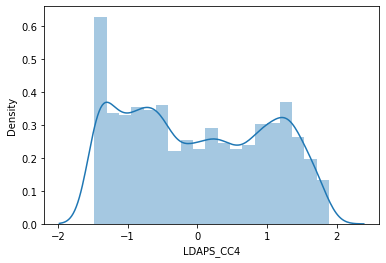

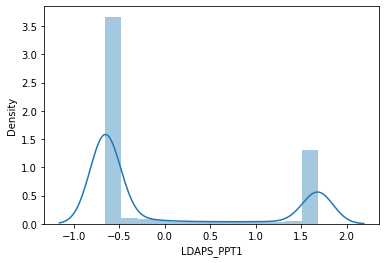

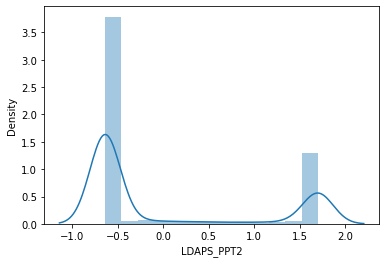

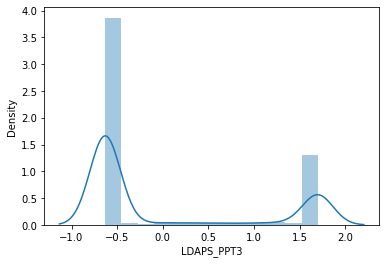

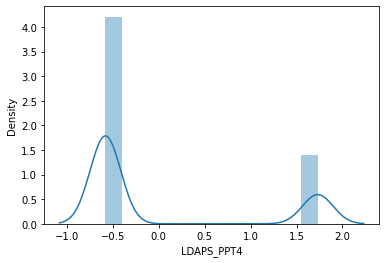

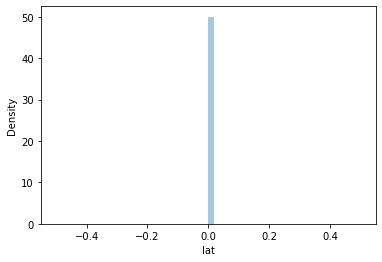

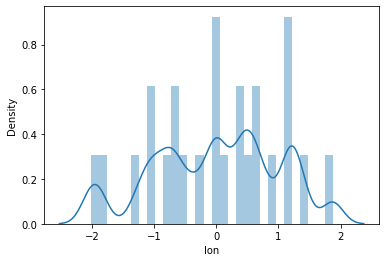

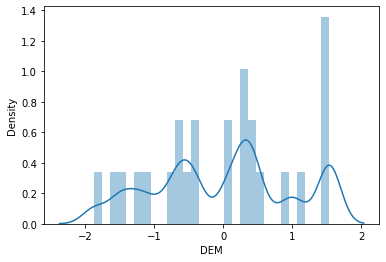

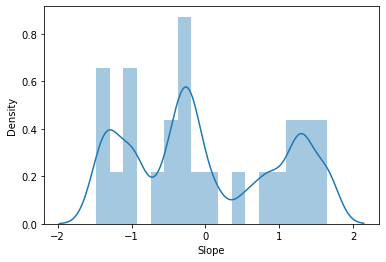

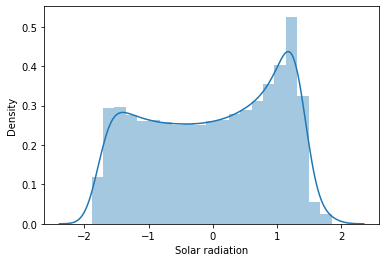

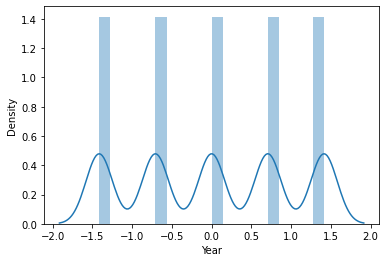

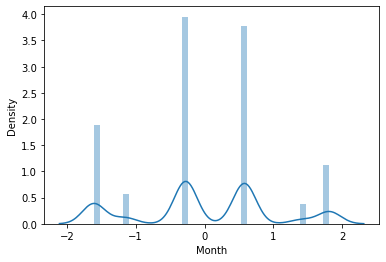

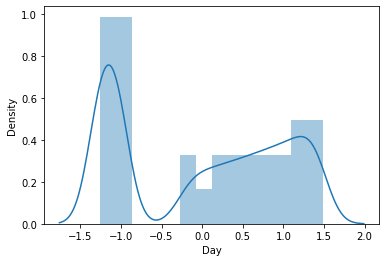

In [48]:
col=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Year', 'Month', 'Day']
for i in df_new[col]:
    plt.figure()
    sns.distplot(df_new[i])
    
# checking skewness through the graph
# skewness almost resolved

In [49]:
df=df_new

In [50]:
df.shape

(7752, 25)

# Model Train,Test and Split

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [56]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6046, 25)
(1706, 25)
(6046, 2)
(1706, 2)


In [59]:
model = [lr, knr, dtr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred_test = m.predict(x_test)
    pred_train = m.predict(x_train)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred_test))
    print('Mean squared error: ', mean_squared_error(y_test,pred_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test)))
    print('R2 Score: ', r2_score(y_test,pred_test))
    print('\n')
    print("Predicted value and actual value", pred_test,y_test)
    print('\n\n')
    

LinearRegression()
Score:  0.8087433429263742
Mean absolute error:  0.9535205475837476
Mean squared error:  1.6278731450126467
Root mean squared error:  1.2758813208965192
R2 Score:  0.798997315947466


Predicted value and actual value [[31.60383474 21.83609602]
 [29.65056488 22.89702513]
 [30.31770288 23.70706471]
 ...
 [31.73325077 23.89459965]
 [30.70748221 22.88383333]
 [31.14719127 25.35854458]]       Next_Tmax  Next_Tmin
1378       32.9       22.1
88         27.5       22.7
6419       29.1       23.0
2986       27.5       19.4
3850       30.0       23.6
...         ...        ...
4438       32.1       21.7
6655       34.2       25.3
7513       31.6       23.5
4982       32.5       23.7
828        33.0       26.5

[1706 rows x 2 columns]



KNeighborsRegressor()
Score:  0.690594136776933
Mean absolute error:  1.469204572098474
Mean squared error:  3.5011154806565057
Root mean squared error:  1.8711267943826002
R2 Score:  0.5431729942065711


Predicted value and actual value [[29.6

As we can see that the best R2 score and accuracy scroe is around 90% from RandomFroestRegressor 

In [60]:
rfr.fit(x_train, y_train)
a = rfr.score(x_train, y_train)
pred_train = rfr.predict(x_train)
pred_test_rfr =rfr.predict(x_test)

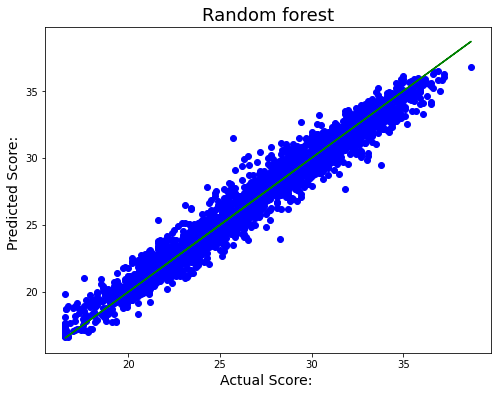

In [63]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test_rfr, color = 'b')
plt.plot(y_test, y_test, color = 'g')
plt.xlabel('Actual Score: ', fontsize = 14)
plt.ylabel('Predicted Score: ', fontsize = 14)
plt.title('Random forest', fontsize = 18)
plt.show()

# Saving the model

In [70]:
#we are saving our model from rfr as we got best r2 score from it
joblib.dump(rfr,"Temperature_Forecast.obj")

['Temperature_Forecast.obj']

In [74]:
Temperature_Forecast=joblib.load("Temperature_Forecast.obj")
Temperature_Forecast.predict(x_train)

array([[32.3088, 23.929 ],
       [32.205 , 23.164 ],
       [30.923 , 23.453 ],
       ...,
       [32.284 , 27.284 ],
       [27.053 , 22.849 ],
       [32.33  , 24.857 ]])